# Загрузка данных

In [3]:
import pandas as pd 
import numpy as np

In [4]:
all_data = pd.read_csv('dataset_group.csv', header=None) 
all_data.head()

,0,1,2
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose


In [5]:
unique_id = list(set(all_data[1])) 
print(len(unique_id)) #Выведем количество id

1139


In [6]:
items = list(set(all_data[2])) 
print(len(items)) #Выведем количество товаров

38


In [7]:
dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in items] for id in unique_id]
dataset

[['yogurt',
  'pork',
  'sandwich bags',
  'lunch meat',
  'all- purpose',
  'flour',
  'soda',
  'butter',
  'vegetables',
  'beef',
  'aluminum foil',
  'all- purpose',
  'dinner rolls',
  'shampoo',
  'all- purpose',
  'mixes',
  'soap',
  'laundry detergent',
  'ice cream',
  'dinner rolls'],
 ['toilet paper',
  'shampoo',
  'hand soap',
  'waffles',
  'vegetables',
  'cheeses',
  'mixes',
  'milk',
  'sandwich bags',
  'laundry detergent',
  'dishwashing liquid/detergent',
  'waffles',
  'individual meals',
  'hand soap',
  'vegetables',
  'individual meals',
  'yogurt',
  'cereals',
  'shampoo',
  'vegetables',
  'aluminum foil',
  'tortillas',
  'mixes'],
 ['soda',
  'pork',
  'soap',
  'ice cream',
  'toilet paper',
  'dinner rolls',
  'hand soap',
  'spaghetti sauce',
  'milk',
  'ketchup',
  'sandwich loaves',
  'poultry',
  'toilet paper',
  'ice cream',
  'ketchup',
  'vegetables',
  'laundry detergent',
  'spaghetti sauce',
  'bagels',
  'soap',
  'ice cream',
  'shampoo',

# Подготовка данных

In [8]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder() 
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [9]:
df

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


# Ассоциативный анализ с использованием алгоритма Apriori 

In [10]:
from mlxtend.frequent_patterns import apriori 
results = apriori(df, min_support=0.3, use_colnames=True) 
results['length'] = results['itemsets'].apply(lambda x: len(x)) #добавление размера набора 
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


In [11]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


In [12]:
results = apriori(df, min_support=0.3, use_colnames=True) 
results['length'] = results['itemsets'].apply(lambda x: len(x)) 
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemsets = ',len(results))

     support                                    itemsets  length
38  0.310799                 (vegetables, aluminum foil)       2
39  0.300263                        (bagels, vegetables)       2
40  0.310799                       (vegetables, cereals)       2
41  0.309043                       (vegetables, cheeses)       2
42  0.308165                  (vegetables, dinner rolls)       2
43  0.306409  (vegetables, dishwashing liquid/detergent)       2
44  0.326602                          (vegetables, eggs)       2
45  0.302897                     (vegetables, ice cream)       2
46  0.309043             (vegetables, laundry detergent)       2
47  0.311677                    (vegetables, lunch meat)       2
48  0.331870                       (vegetables, poultry)       2
49  0.305531                          (vegetables, soda)       2
50  0.315189                       (vegetables, waffles)       2
51  0.319579                        (vegetables, yogurt)       2

Count of result itemsets

In [13]:
def apr(dataframe, support):
    results = apriori(dataframe, min_support=support, use_colnames=True) 
    results['length'] = results['itemsets'].apply(lambda x: len(x)) #добавление размера набора 
    for_graph.loc[len(for_graph.index)] = [results.itemsets.nunique(), support] 

In [14]:
for_graph = pd.DataFrame(columns=['count_of_itemsets', 'support'])
for p in range(5, 31, 1):
    apr(df, p/100)
for_graph

,count_of_itemsets,support
0,15749.0,0.05
1,10482.0,0.06
2,4796.0,0.07
3,1836.0,0.08
4,1426.0,0.09
5,1406.0,0.10
6,1383.0,0.11
7,1251.0,0.12
8,1004.0,0.13
9,767.0,0.14


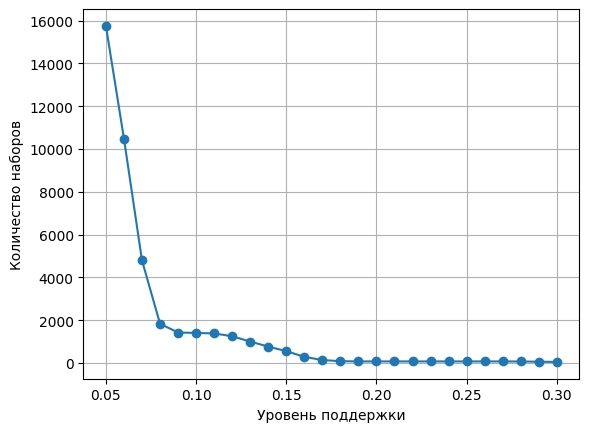

In [15]:
import matplotlib.pyplot as plt
plt.plot(for_graph.support, for_graph.count_of_itemsets, marker='o')
plt.xlabel('Уровень поддержки')
plt.ylabel('Количество наборов')
plt.grid(True)
plt.show()

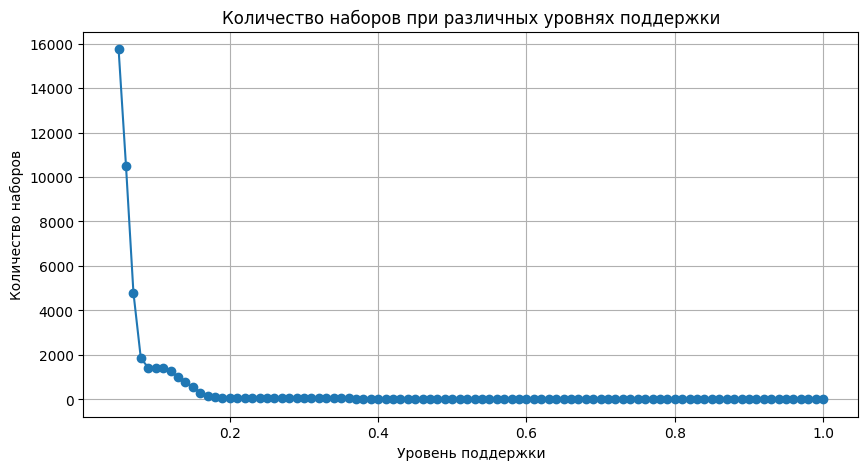

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori

support_values = []
num_itemsets = []

for support in [i/100 for i in range(5, 101, 1)]:
    results = apriori(df, min_support=support, use_colnames=True)
    support_values.append(support)
    num_itemsets.append(len(results))

plt.figure(figsize=(10, 5))
plt.plot(support_values, num_itemsets, marker='o')
plt.xlabel("Уровень поддержки")
plt.ylabel("Количество наборов")
plt.title("Количество наборов при различных уровнях поддержки")
plt.grid(True)
plt.show()

Максимальный уровень поддержки для разных размеров наборов:
Размер 1: 0.7300000000000004
Размер 2: 0.3300000000000001
Размер 3: 0.16
Размер 4: 0.08
Размер 5: 0.04
Размер 6: 0.019999999999999997
Размер 7: 0.01
Размер 8: 0.01
Размер 9: 0.0
Размер 10: 0.0


C:\Users\krum1\AppData\Local\Temp\ipykernel_9092\87027312.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sizes.get(size, 0) == 0 and max_support_for_sizes[size] is None:
C:\Users\krum1\AppData\Local\Temp\ipykernel_9092\87027312.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sizes.get(size, 0) == 0 and max_support_for_sizes[size] is None:
C:\Users\krum1\AppData\Local\Temp\ipykernel_9092\87027312.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by

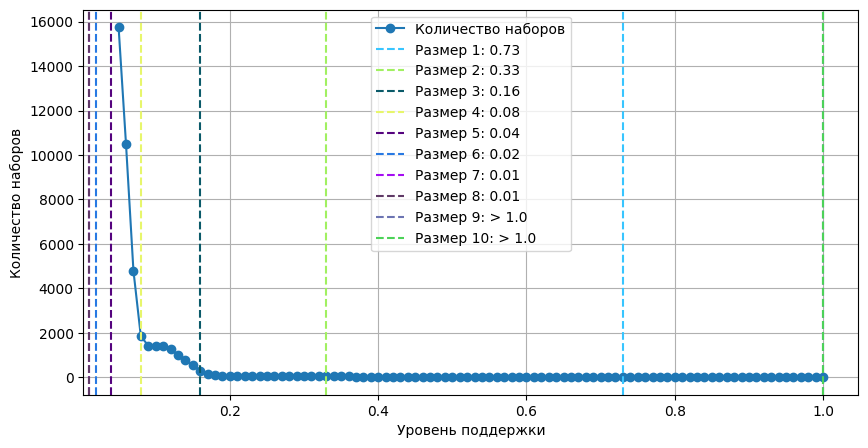

In [17]:
import numpy as np

def find_max_support_for_sizes(df, start=0.01, step=0.01, max_size=10):
    max_support_for_sizes = {i: None for i in range(1, max_size+1)}
    
    support = start
    while support <= 1.0:
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
        sizes = frequent_itemsets['itemsets'].apply(len).value_counts()
        
        for size in range(1, max_size+1):
            if sizes.get(size, 0) == 0 and max_support_for_sizes[size] is None:
                max_support_for_sizes[size] = support - step
        
        complete = all(max_support_for_sizes.values())
        if complete:
            break
        
        support += step
    
    return max_support_for_sizes

max_support_for_sizes = find_max_support_for_sizes(df)

print("Максимальный уровень поддержки для разных размеров наборов:")
for size, support in max_support_for_sizes.items():
    print(f"Размер {size}: {support if support != None else '>1.0'}")

# Построим график с отмеченными уровнями поддержки
plt.figure(figsize=(10, 5))
plt.plot(support_values, num_itemsets, marker='o', label="Количество наборов")

for size, support in max_support_for_sizes.items():
    if support:
        plt.axvline(x=support, linestyle='--', color=np.random.rand(3,), label=f'Размер {size}: {support:.2f}')
    else:
        plt.axvline(x=1.0, linestyle='--', color=np.random.rand(3,), label=f'Размер {size}: > 1.0')

plt.xlabel("Уровень поддержки")
plt.ylabel("Количество наборов")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [18]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1) 
new_items = [ list(elem)[0] for elem in results['itemsets']] 
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in new_items] for id in unique_id]

In [19]:
new_dataset

[['yogurt',
  'lunch meat',
  'soda',
  'vegetables',
  'aluminum foil',
  'dinner rolls',
  'ice cream',
  'dinner rolls'],
 ['waffles',
  'vegetables',
  'cheeses',
  'milk',
  'dishwashing liquid/detergent',
  'waffles',
  'vegetables',
  'yogurt',
  'cereals',
  'vegetables',
  'aluminum foil'],
 ['soda',
  'ice cream',
  'dinner rolls',
  'milk',
  'poultry',
  'ice cream',
  'vegetables',
  'bagels',
  'ice cream',
  'lunch meat',
  'cereals',
  'vegetables',
  'cheeses',
  'eggs',
  'vegetables',
  'vegetables'],
 ['cereals', 'lunch meat', 'soda'],
 ['vegetables',
  'vegetables',
  'vegetables',
  'vegetables',
  'poultry',
  'eggs',
  'vegetables',
  'vegetables',
  'milk',
  'waffles',
  'vegetables',
  'dinner rolls',
  'soda',
  'yogurt'],
 ['eggs',
  'vegetables',
  'bagels',
  'dishwashing liquid/detergent',
  'cereals',
  'cereals',
  'bagels',
  'poultry',
  'bagels',
  'aluminum foil',
  'milk'],
 ['vegetables',
  'milk',
  'ice cream',
  'dishwashing liquid/detergent',

In [20]:
remaining_items_dataset = [[elem for elem in all_data[all_data[1] == id][2] 
                            if elem not in new_items] for id in unique_id]
print(remaining_items_dataset)

[['pork', 'sandwich bags', 'all- purpose', 'flour', 'butter', 'beef', 'all- purpose', 'shampoo', 'all- purpose', 'mixes', 'soap', 'laundry detergent'], ['toilet paper', 'shampoo', 'hand soap', 'mixes', 'sandwich bags', 'laundry detergent', 'individual meals', 'hand soap', 'individual meals', 'shampoo', 'tortillas', 'mixes'], ['pork', 'soap', 'toilet paper', 'hand soap', 'spaghetti sauce', 'ketchup', 'sandwich loaves', 'toilet paper', 'ketchup', 'laundry detergent', 'spaghetti sauce', 'soap', 'shampoo', 'spaghetti sauce', 'pork'], ['juice', 'toilet paper', 'all- purpose'], ['sandwich loaves', 'pasta', 'tortillas', 'mixes', 'hand soap', 'toilet paper', 'paper towels', 'flour', 'pork', 'pork', 'spaghetti sauce', 'individual meals', 'all- purpose'], ['laundry detergent', 'toilet paper', 'toilet paper', 'paper towels', 'laundry detergent', 'butter', 'paper towels', 'shampoo', 'toilet paper', 'soap', 'soap', 'pasta', 'coffee/tea', 'butter', 'spaghetti sauce', 'ketchup', 'all- purpose'], ['in

In [21]:
te2 = TransactionEncoder() 
te2_ary = te2.fit(new_dataset).transform(new_dataset) 
df2 = pd.DataFrame(te2_ary, columns=te2.columns_)
df2

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


In [22]:
te3 = TransactionEncoder() 
te3_ary = te3.fit(remaining_items_dataset).transform(remaining_items_dataset) 
df3 = pd.DataFrame(te3_ary, columns=te3.columns_)
df3

,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,True,False,True,False,True,True,False,True,False,...,False,True,True,False,True,True,False,True,False,False
1135,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1136,False,True,False,False,False,False,True,True,True,False,...,False,True,False,False,True,True,False,True,False,True
1137,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,True,True,False


In [23]:
results2 = apriori(df2, min_support=0.3, use_colnames=True) 
results2['length'] = results2['itemsets'].apply(lambda x: len(x)) #добавление размера набора 
results2

,support,itemsets,length
0,0.384548,(aluminum foil),1
1,0.385426,(bagels),1
2,0.395961,(cereals),1
3,0.390694,(cheeses),1
4,0.388938,(dinner rolls),1
5,0.388060,(dishwashing liquid/detergent),1
6,0.389816,(eggs),1
7,0.398595,(ice cream),1
8,0.395083,(lunch meat),1
9,0.380158,(milk),1


In [24]:
results3 = apriori(df3, min_support=0.3, use_colnames=True) 
results3['length'] = results3['itemsets'].apply(lambda x: len(x)) #добавление размера набора 
results3

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.374890,(beef),1
2,0.367867,(butter),1
3,0.379280,(coffee/tea),1
4,0.352941,(flour),1
5,0.370500,(fruits),1
6,0.345917,(hand soap),1
7,0.375768,(individual meals),1
8,0.376646,(juice),1
9,0.371378,(ketchup),1


In [40]:
filtered_sets = results3[results3['itemsets'].apply(lambda x: sum(1 for item in x if item.startswith('s')) >= 2)]

# Печать результатов
results3.iloc[19]

support              0.373134
itemsets    (spaghetti sauce)
length                      1
Name: 19, dtype: object

In [50]:

not_in_new_items = [item for item in all_data[2] if item not in new_items]

complement_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in not_in_new_items] for id in unique_id]


from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(complement_dataset).transform(complement_dataset)
complement_df = pd.DataFrame(te_ary, columns=te.columns_)

results_complement = apriori(complement_df, min_support=0.1, use_colnames=True)

def filter_sets_with_two_s(itemsets):
    return [itemset for itemset in itemsets if sum(item.startswith('s') for item in itemset) >= 2]

filtered_sets = filter_sets_with_two_s(results_complement['itemsets'])

filtered_by_support = results_complement[(results_complement['support'] >= 0.1) & (results_complement['support'] <= 0.25)]
filtered_by_support.sort_values(by='support')

,support,itemsets
45,0.128183,"(butter, beef)"
131,0.128183,"(pork, fruits)"
203,0.129061,"(laundry detergent, sandwich loaves)"
147,0.129939,"(pork, hand soap)"
245,0.131694,"(pork, sugar)"
...,...,...
186,0.165057,"(ketchup, mixes)"
48,0.165935,"(fruits, beef)"
179,0.170325,"(shampoo, juice)"
183,0.172081,"(toilet paper, juice)"
